In [1]:
from correlation import *

import pandas as pd
import numpy as np

In [2]:
genes = pd.read_csv('data/gene_fpkm.txt', sep='\t')

genes = genes.drop_duplicates(subset=['GENE_ID'], keep='first')

genes = genes.rename(columns={'GENE_ID': 'MMRF'})

genes = genes.set_index('MMRF')

del genes['Location']

genes = genes[[i for i in genes.columns if '_1_' in i]]

genes.columns = [i.split('_')[1] for i in genes.columns]

genes = genes.T

genes.index = [int(i) for i in genes.index]

genes.iloc[:10,:10]

MMRF,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167
2438,0.645325,0.000000,32.1035,7.66910,7.06020,0.719675,15.395500,50.19260,11.32710,18.69440
1786,3.519150,0.000000,29.3108,4.96608,1.50599,0.705555,1.283390,22.90920,7.74184,12.50950
1332,6.873060,0.000000,41.2908,8.25159,4.64106,0.927851,0.072551,46.13120,13.67120,18.62340
2562,5.441500,0.000000,27.8386,8.23226,2.71763,0.415857,0.064742,14.38730,15.64070,17.71990
1797,0.000000,0.000000,36.8206,7.72755,3.28094,0.220043,0.000000,17.05950,17.28590,13.67230
1861,0.404031,0.000000,41.0652,5.04330,1.54744,49.960800,1.267370,9.27582,8.13927,15.71420
1823,3.682560,0.000000,60.5635,2.57942,1.71766,0.545700,0.165141,38.00400,9.23173,15.48300
2018,0.795386,0.000000,29.0764,4.87317,2.25814,0.311901,0.685952,14.98340,11.31560,13.93950
2268,2.714760,0.491686,31.3695,2.17873,2.26555,172.304000,1.235570,21.47350,11.27650,10.58360
2570,0.124405,0.000000,39.5649,1.60298,1.19724,0.925557,0.222275,17.35290,5.64112,6.85792


In [3]:
clinical_data = pd.read_csv('data/iss_fish_therapy_response.csv', sep='\t')

clinical_data['MMRF'] = [int(i.replace('MMRF', '')) for i in clinical_data['MMRF']]

clinical_data = clinical_data.loc[clinical_data['Days-to-Progression'].notnull(),:]

clinical_data = clinical_data.set_index('MMRF')

#del clinical_data['Days-to-Overall-Survivel']

clinical_data.iloc[:10, :10]

,Best-Response-FirstLine,Days-to-Overall-Survival,Days-to-Progression,Patient-FirstResponse,ISS,del13q14,del13q34,del17p13,Age,Race
MMRF,,,,,,,,,,
1007,SD,327.0,326.0,NaN,III,NaN,NaN,NaN,78,W
1011,VGPR,1969.0,1612.0,PR,III,NaN,NaN,NaN,50,W
1013,CR,1759.0,1638.0,PR,III,NaN,NaN,NaN,66,W
1016,VGPR,692.0,691.0,VGPR,I,B,B,ND,56,W
1017,VGPR,508.0,507.0,PR,I,NaN,NaN,NaN,75,W
1020,CR,1826.0,713.0,VGPR,I,NaN,NaN,NaN,60,W
1021,VGPR,1932.0,622.0,PR,I,B,B,ND,54,W
1024,PR,1927.0,653.0,PR,II,NaN,NaN,NaN,79,W
1030,CR,1984.0,1983.0,PR,I,ND,ND,ND,65,W


In [4]:
groups = {1: (['SCR'], ['CR', 'VGPR', 'PR', 'SD', 'PD']),
          2: (['SCR', 'CR'], ['VGPR', 'PR', 'SD', 'PD']),
          3: (['SCR', 'CR', 'VGPR'], ['PR', 'SD', 'PD']),
          4: (['SCR', 'CR', 'VGPR', 'PR'], ['SD', 'PD']),
          5: (['SCR', 'CR', 'VGPR', 'PR', 'SD'], ['PD']),
          6: (['SCR'], ['CR', 'VGPR'], ['PR', 'SD', 'PD']),
          7: (['SCR'], ['CR', 'VGPR', 'PR'], ['SD', 'PD'])}

var_resp = ['Days-to-Progression']

clinical_data['Greater18Months-Days-to-Progression'] = [int(i > 18 * 30) for i in clinical_data['Days-to-Progression']]

var_resp.append('Greater18Months-Days-to-Progression')

for i in range(1,6):
    
    var_resp.append('Group{}-From-Best-Response-FirstLine'.format(i))
    
    clinical_data[var_resp[-1]] = clinical_data['Best-Response-FirstLine'].apply(lambda x: 0 if x in groups[i][0] else 1)

clinical_data['Best-Response-FirstLine-ID'] = \
    clinical_data['Best-Response-FirstLine'].map({'SD': 1, 'VGPR': 2, 'CR': 3, 'PR': 3, 'SCR': 4, 'PD': 5, None: 0, np.nan: 0})

var_resp.append('Best-Response-FirstLine-ID')

clinical_data[var_resp].head()

,Days-to-Progression,Greater18Months-Days-to-Progression,Group1-From-Best-Response-FirstLine,Group2-From-Best-Response-FirstLine,Group3-From-Best-Response-FirstLine,Group4-From-Best-Response-FirstLine,Group5-From-Best-Response-FirstLine,Best-Response-FirstLine-ID
MMRF,,,,,,,,
1007,326.0,0,1,1,1,1,0,1
1011,1612.0,1,1,1,0,0,0,2
1013,1638.0,1,1,0,0,0,0,3
1016,691.0,1,1,1,0,0,0,2
1017,507.0,0,1,1,0,0,0,2


In [ ]:
clinical_data[var_resp[1:-1]].to_csv('data/output/derived_dependent_variables.csv', index=False, sep=',')

clinical_data[var_resp[1:-1]].head()

# Select Genes

In [5]:
genes_with_resp = clinical_data[var_resp].join(genes, how='inner')

In [6]:
kss = compute_distcorr(genes_with_resp.copy(), var_resp)

kss.head()

,IND_VAR,DEP_VAR,distcorr
0,ENSG00000000003,Days-to-Progression,0.951692
1,ENSG00000000003,Greater18Months-Days-to-Progression,0.926277
2,ENSG00000000003,Group1-From-Best-Response-FirstLine,0.968992
3,ENSG00000000003,Group2-From-Best-Response-FirstLine,0.962752
4,ENSG00000000003,Group3-From-Best-Response-FirstLine,1.019815


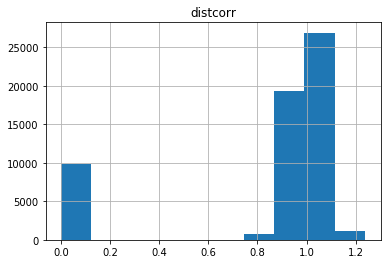

In [7]:
%matplotlib inline

kss.loc[kss['DEP_VAR'] == 'Group3-From-Best-Response-FirstLine'].replace([np.inf, -np.inf], np.nan).fillna(0).hist();

In [11]:
for resp in var_resp:
    
    f = kss.loc[kss['DEP_VAR'] == resp]

    f = f.loc[f['distcorr'] >= 1.2, :]
    
    print(f.shape)
    
    if f.shape[0] > 0:
    
        ind_vars = f.sort_values(by='distcorr', ascending =False)['IND_VAR'].values

        genes_pearson = genes[ind_vars].corr()
        
        print(genes_pearson)
        
        break   


(237, 3)
MMRF             ENSG00000127586  ENSG00000116691  ENSG00000154920  \
MMRF                                                                 
ENSG00000127586         1.000000         0.259143         0.776888   
ENSG00000116691         0.259143         1.000000         0.199375   
ENSG00000154920         0.776888         0.199375         1.000000   
ENSG00000100162         0.381761         0.183472         0.403718   
ENSG00000169689         0.527591         0.366192         0.463505   
ENSG00000125835         0.403633         0.288752         0.370324   
ENSG00000124562         0.209119         0.238432         0.274874   
ENSG00000141552         0.230724         0.345113         0.277569   
ENSG00000187741         0.631165         0.259887         0.631544   
ENSG00000104738         0.589068         0.321728         0.694349   
ENSG00000176208         0.687868         0.154394         0.787579   
ENSG00000131153         0.583152         0.186617         0.661831   
ENSG0000011

In [12]:
df_gen = pd.DataFrame(genes_pearson)

all_genes = set(df_gen.index)

deleted_gens = set()

for i, n in enumerate(df_gen.columns):
    
    tmp = df_gen.loc[list(df_gen.index[(i+1):]),n].reset_index()
    
    tmp = pd.DataFrame({'V2': tmp['MMRF'], 'PCC': tmp[n].abs()})
    
    subset = set(tmp.loc[tmp['PCC'] >= .75,'V2'])
    
    deleted_gens = deleted_gens.union(subset)
    
print(len(all_genes.difference(deleted_gens)), len(deleted_gens))


146 91


In [ ]:
from sklearn.decomposition import PCA

all_ = clinical_data.join(genes[all_genes.difference(deleted_gens)], how='inner')

resp = all_[var_resp].copy()

for v in var_resp:
    del all_[v]
    
for col in all_.columns:
    if all_[col].dtype == 'object':
        all_[col] = pd.factorize(all_[col])[0] + 1

pca = PCA(n_components=2)

pcas = pca.fit_transform(all_.values)

r = pd.DataFrame({'PCA1': pcas[:,0], 'PCA2': pcas[:,1]})

for c in resp.columns:
    r[c] = resp[c].values
    

r.to_csv('data/output/pca_with_resp_and_reduction.csv')
    
r.head()

In [ ]:
for c in clinical_data.columns:
    print(c)

In [ ]:
all_ = clinical_data.join(genes, how='inner')

resp = all_[var_resp].copy()

for v in var_resp:
    del all_[v]
    
for col in all_.columns:
    if all_[col].dtype == 'object':
        all_[col] = pd.factorize(all_[col])[0] + 1

pca = PCA(n_components=2)

pcas = pca.fit_transform(all_.values)

r = pd.DataFrame({'PCA1': pcas[:,0], 'PCA2': pcas[:,1]})

for c in resp.columns:
    r[c] = resp[c].values
    

r.to_csv('data/output/pca_with_resp.csv')
    
r.head()

In [ ]:
len(genes.columns), len(pd.unique(genes.columns))

In [ ]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    

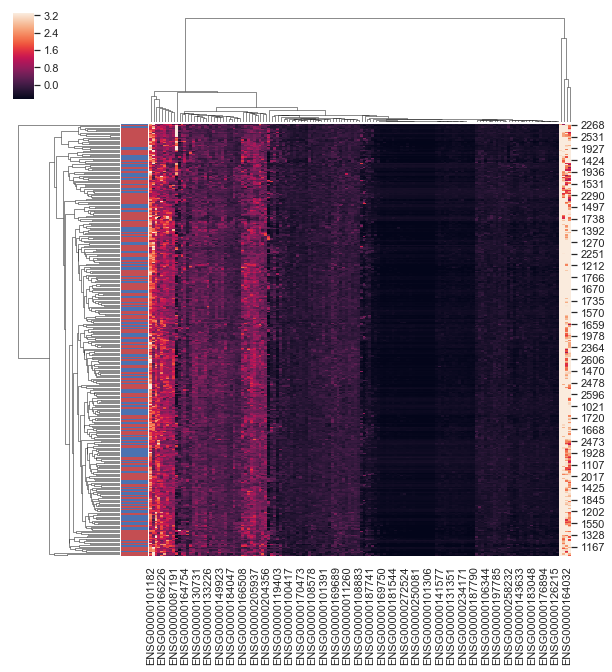

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

tmp = genes[all_genes.difference(deleted_gens)]

tmp = tmp.join(clinical_data['Greater18Months-Days-to-Progression'], how='inner')

tmp = tmp.sort_values(by='Greater18Months-Days-to-Progression')

resp = tmp.pop('Greater18Months-Days-to-Progression')

resp.name = ''

lut = dict(zip(resp.unique(), "rb"))

row_colors = resp.map(lut)

sns_plot = sns.clustermap(tmp, row_colors=row_colors, robust =True, z_score=0,
                          row_cluster=True, col_cluster=True);

#sns_plot.fig.savefig("images/heatmap.png")

sns_plot